### Lesson 2 Overview
- __geopandas__ : reading and writing GIS file formats with `geopandas`
- __spatial analysis__ `on spatial and non-spatial data`
- __coordinate reference systems: (CRS)__ with `pyproj`
- __Plotting__ with `matplotlib`
- manage __CRS__ and re-project data

#### Vector Data I/O with geopandas

In [1]:
import geopandas as gpd

# geopandas open different file formats using the appropriate drivers
# the `fiona` model is the base package that works in the background to open file

# view the available drivers for doing GIS data I/O
gpd.io.file.fiona.drvsupport.supported_drivers

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'raw',
 'DXF': 'raw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'GeoJSON': 'rw',
 'GeoJSONSeq': 'rw',
 'GPKG': 'rw',
 'GML': 'raw',
 'GPX': 'raw',
 'GPSTrackMaker': 'raw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'r',
 'S57': 'r',
 'SEGY': 'r',
 'SUA': 'r',
 'TopoJSON': 'r'}

In [5]:
DATA_DIR = "data"
OUTPUT_DIR = "temp"

## the default driver for I/O is the ESRI shapefile
#shapefile_data = gpd.read_file(f'{DATA_DIR}/finland_municipalities.shp')

# write to another GIS file format
#shapefile_data.to_file(f'{OUTPUT_DIR}/finland_municipalities.gjson')

## Geopandas

In [6]:
SHAPEFILE_DIR = f'{DATA_DIR}/L2/NLS/2018/L4/L41/L4132R.shp'
print(SHAPEFILE_DIR)

data/L2/NLS/2018/L4/L41/L4132R.shp


In [10]:
#  Join directory and filename paths
import os

shapefile_path = os.path.abspath(f'{SHAPEFILE_DIR}/m_L4132R_p.shp')
print(shapefile_path)

C:\Users\big yeti\autogis\lesson2\data\L2\NLS\2018\L4\L41\L4132R.shp\m_L4132R_p.shp


In [13]:
# reading the shapefile
shapefile_data = gpd.read_file(shapefile_path)
type(shapefile_data)

geopandas.geodataframe.GeoDataFrame

In [14]:
shapefile_data.head()

,TEKSTI,RYHMA,LUOKKA,TASTAR,KORTAR,KORARV,KULKUTAPA,KOHDEOSO,AINLAHDE,SYNTYHETKI,...,KARTOGLK,ALUEJAKOON,VERSUH,SUUNTA,SIIRT_DX,SIIRT_DY,KORKEUS,ATTR2,ATTR3,geometry
0,None,64,32421,5000,0,0.0,0,1812247077,1,20180125,...,0,0,0,0,0,0,0.0,0,0,"POLYGON ((379394.248 6689991.936, 379389.790 6..."
1,None,64,32421,5000,0,0.0,0,1718796908,1,20180120,...,0,0,0,0,0,0,0.0,0,0,"POLYGON ((378980.811 6689359.377, 378983.401 6..."
2,None,64,32421,20000,0,0.0,0,411167695,1,20180120,...,0,0,0,0,0,0,0.0,0,0,"POLYGON ((378804.766 6689256.471, 378817.107 6..."
3,None,64,32421,20000,0,0.0,0,411173768,1,20180120,...,0,0,0,0,0,0,0.0,0,0,"POLYGON ((379229.695 6685025.111, 379233.366 6..."
4,None,64,32421,20000,0,0.0,0,411173698,1,20180120,...,0,0,0,0,0,0,0.0,0,0,"POLYGON ((379825.199 6685096.247, 379829.651 6..."


In [16]:
# checkout the column names
shapefile_data.columns.values

array(['TEKSTI', 'RYHMA', 'LUOKKA', 'TASTAR', 'KORTAR', 'KORARV',
       'KULKUTAPA', 'KOHDEOSO', 'AINLAHDE', 'SYNTYHETKI', 'KUOLHETKI',
       'KARTOGLK', 'ALUEJAKOON', 'VERSUH', 'SUUNTA', 'SIIRT_DX',
       'SIIRT_DY', 'KORKEUS', 'ATTR2', 'ATTR3', 'geometry'], dtype=object)

In [17]:
# select subsect of data we want
shapefile_data = shapefile_data[['RYHMA', 'LUOKKA', 'geometry']]

# rename columns to english
colnames = {'RYHMA':'GROUP', 'LUOKKA':'CLASS'}
shapefile_data.rename(columns=colnames, inplace=True)

# inspect data
shapefile_data.head()

,GROUP,CLASS,geometry
0,64,32421,"POLYGON ((379394.248 6689991.936, 379389.790 6..."
1,64,32421,"POLYGON ((378980.811 6689359.377, 378983.401 6..."
2,64,32421,"POLYGON ((378804.766 6689256.471, 378817.107 6..."
3,64,32421,"POLYGON ((379229.695 6685025.111, 379233.366 6..."
4,64,32421,"POLYGON ((379825.199 6685096.247, 379829.651 6..."


In [22]:
print(f"Number of rows: {len(shapefile_data['CLASS'])}")
print(f"Number of classes: {shapefile_data['CLASS'].nunique()}")
print(f"Number of groups: {shapefile_data['GROUP'].nunique()}")

Number of rows: 4311
Number of classes: 20
Number of groups: 1


In [ ]:
# plot data for quick visualization
shapefile_data.plot()

### Geometries in Geopandas

In [26]:
# view the geometry of geopandas
shapefile_data['geometry'].head()

0    POLYGON ((379394.248 6689991.936, 379389.790 6...
1    POLYGON ((378980.811 6689359.377, 378983.401 6...
2    POLYGON ((378804.766 6689256.471, 378817.107 6...
3    POLYGON ((379229.695 6685025.111, 379233.366 6...
4    POLYGON ((379825.199 6685096.247, 379829.651 6...
Name: geometry, dtype: geometry

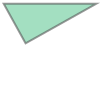

In [28]:
shapefile_data.at[0, 'geometry']

In [30]:
# calculate area of polygon
print(f"Area: {shapefile_data.at[0, 'geometry'].area} square metres")

Area: 76.02739200243447 square metres


In [32]:
# iterate over rows and print area
for idx, row in shapefile_data[:5].iterrows():
    print(f"Polygon area at index {idx} is {round(row['geometry'].area, 2)} sq meters")

Polygon area at index 0 is 76.03 sq meters
Polygon area at index 1 is 2652.05 sq meters
Polygon area at index 2 is 3185.65 sq meters
Polygon area at index 3 is 13075.17 sq meters
Polygon area at index 4 is 3980.68 sq meters


In [34]:
# we can get the area of all data at once
shapefile_data.area

0          76.027392
1        2652.054186
2        3185.649995
3       13075.165279
4        3980.682621
            ...     
4306     2651.800270
4307      376.503380
4308      413.942555
4309     3487.927677
4310     1278.963199
Length: 4311, dtype: float64

In [36]:
# we can add it as a new column in dataframe
shapefile_data['area'] = shapefile_data.area

In [43]:
shapefile_data.tail()

,GROUP,CLASS,geometry,area
4306,64,36313,"POLYGON ((375668.607 6682942.062, 375671.489 6...",2651.800270
4307,64,36313,"POLYGON ((368411.063 6679328.990, 368411.424 6...",376.503380
4308,64,36313,"POLYGON ((368054.608 6679164.737, 368059.602 6...",413.942555
4309,64,36313,"POLYGON ((368096.331 6678000.000, 368090.276 6...",3487.927677
4310,64,36313,"POLYGON ((368000.666 6678460.142, 368000.000 6...",1278.963199


In [40]:
# find the largest polygon in dataset
round(shapefile_data['area'].max(), 2)

4084558.15

In [41]:
# find the smallest area
round(shapefile_data['area'].min(), 2)

0.67

In [42]:
# find the mean area
round(shapefile_data['area'].mean(), 2)

11522.29

### Writing data to shapefile

In [46]:
# select a class
selection = shapefile_data.loc[shapefile_data['CLASS']==36200]

<AxesSubplot:>

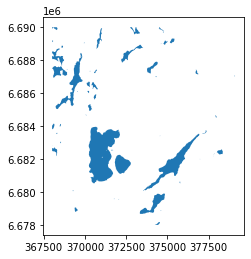

In [48]:
# view a plot of the selection
selection.plot()

In [57]:
# write selection to file
output_dir = r'data/L2'
output_file = os.path.abspath(f'{output_dir}/Class_36200')
output_file
selection.to_file(output_file)

C:\ProgramData\Anaconda3\envs\autogis_lesson2\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [59]:
# read the saved file and check it out
tmp = gpd.read_file(output_file)
tmp.head()

,GROUP,CLASS,area,geometry
0,64,36200,1318.878221,"POLYGON ((379089.473 6687069.722, 379093.838 6..."
1,64,36200,22918.867073,"POLYGON ((376732.156 6687178.141, 376731.301 6..."
2,64,36200,5759.318345,"POLYGON ((377939.741 6684539.678, 377929.192 6..."
3,64,36200,265899.648379,"POLYGON ((372948.857 6688594.047, 372935.951 6..."
4,64,36200,128221.314258,"POLYGON ((370900.963 6689201.649, 370890.077 6..."


<AxesSubplot:>

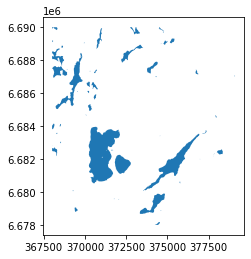

In [60]:
tmp.plot()

### Grouping GeodataFrame

In [61]:
# view all unique columns in geodata
shapefile_data['CLASS'].unique()

array([32421, 32200, 34300, 34100, 34700, 32500, 32112, 32111, 32611,
       32612, 32800, 32900, 35300, 35412, 35411, 35421, 33000, 33100,
       36200, 36313], dtype=int64)

- now we can group data by class

In [62]:
class_groups = shapefile_data.groupby('CLASS')

class_groups

In [63]:
# the groups are similar to a dict with keys and values
class_groups.groups.keys()

dict_keys([32111, 32112, 32200, 32421, 32500, 32611, 32612, 32800, 32900, 33000, 33100, 34100, 34300, 34700, 35300, 35411, 35412, 35421, 36200, 36313])

In [66]:
# iterate and print keys and number of values in each group
for key, grp in class_groups:
    print('Terrain class: ', key)
    print('Number of rows: ', len(grp), '\n')

Terrain class:  32111
Number of rows:  1 

Terrain class:  32112
Number of rows:  1 

Terrain class:  32200
Number of rows:  2 

Terrain class:  32421
Number of rows:  110 

Terrain class:  32500
Number of rows:  2 

Terrain class:  32611
Number of rows:  257 

Terrain class:  32612
Number of rows:  11 

Terrain class:  32800
Number of rows:  80 

Terrain class:  32900
Number of rows:  28 

Terrain class:  33000
Number of rows:  5 

Terrain class:  33100
Number of rows:  118 

Terrain class:  34100
Number of rows:  3005 

Terrain class:  34300
Number of rows:  1 

Terrain class:  34700
Number of rows:  3 

Terrain class:  35300
Number of rows:  134 

Terrain class:  35411
Number of rows:  35 

Terrain class:  35412
Number of rows:  449 

Terrain class:  35421
Number of rows:  5 

Terrain class:  36200
Number of rows:  56 

Terrain class:  36313
Number of rows:  8 



In [72]:
# check the data of each grp from the iterations
grp.head()

,GROUP,CLASS,geometry,area
4303,64,36313,"POLYGON ((377127.305 6688073.257, 377116.045 6...",9619.307973
4304,64,36313,"POLYGON ((371141.897 6677999.999, 371139.757 6...",25266.167705
4305,64,36313,"POLYGON ((371498.720 6680399.799, 371497.585 6...",364.087680
4306,64,36313,"POLYGON ((375668.607 6682942.062, 375671.489 6...",2651.800270
4307,64,36313,"POLYGON ((368411.063 6679328.990, 368411.424 6...",376.503380


In [73]:
type(grp)

geopandas.geodataframe.GeoDataFrame

In [77]:
results_dir = f'{output_dir}/Results'
os.makedirs(results_dir)
for cls_name, grp in class_groups:
    filepath = os.path.abspath(f"{results_dir}/terrain_{cls_name}")
    print('saving to ', filepath)
    grp.to_file(filepath)

saving to  C:\Users\big yeti\autogis\lesson2\data\L2\Results\terrain_32111
saving to  C:\Users\big yeti\autogis\lesson2\data\L2\Results\terrain_32112
saving to  C:\Users\big yeti\autogis\lesson2\data\L2\Results\terrain_32200
saving to  C:\Users\big yeti\autogis\lesson2\data\L2\Results\terrain_32421
saving to  C:\Users\big yeti\autogis\lesson2\data\L2\Results\terrain_32500
saving to  C:\Users\big yeti\autogis\lesson2\data\L2\Results\terrain_32611
saving to  C:\Users\big yeti\autogis\lesson2\data\L2\Results\terrain_32612
saving to  C:\Users\big yeti\autogis\lesson2\data\L2\Results\terrain_32800
saving to  C:\Users\big yeti\autogis\lesson2\data\L2\Results\terrain_32900
saving to  C:\Users\big yeti\autogis\lesson2\data\L2\Results\terrain_33000
saving to  C:\Users\big yeti\autogis\lesson2\data\L2\Results\terrain_33100
saving to  C:\Users\big yeti\autogis\lesson2\data\L2\Results\terrain_34100
saving to  C:\Users\big yeti\autogis\lesson2\data\L2\Results\terrain_34300
saving to  C:\Users\big y

#### saving  to csv

In [78]:
# sum of area of each class
area_info = class_groups.area.sum().round()

In [79]:
area_info

CLASS
32111        1834.0
32112        2148.0
32200      105737.0
32421      702073.0
32500      109747.0
32611    13135597.0
32612      107343.0
32800     1465278.0
32900      617209.0
33000      659465.0
33100     3777595.0
34100    12381611.0
34300        1627.0
34700        2786.0
35300     1382940.0
35411      411198.0
35412     4710133.0
35421       67864.0
36200     9986966.0
36313       43459.0
Name: area, dtype: float64

In [80]:
area_info.to_csv(os.path.join(results_dir, 'terrain_class_areas.csv'), header=True)

## [Map Projections](https://autogis-site.readthedocs.io/en/latest/notebooks/L2/02-projections.html)


In [90]:
def read_shapefile(path):
    return gpd.read_file(path)

def save_shapefile(shp, path):
    shp.to_file(path)

shapefile_eu = read_shapefile(f"{DATA_DIR}/L2/Europe_borders.shp")

In [83]:
shapefile_eu.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [84]:
shapefile_eu.head()

,TZID,geometry
0,Europe/Berlin,"POLYGON ((8.45778 54.56236, 8.44953 54.56269, ..."
1,Europe/Berlin,"POLYGON ((8.71992 47.69664, 8.72092 47.69530, ..."
2,Europe/Berlin,"POLYGON ((6.73317 53.57409, 6.73017 53.57542, ..."
3,Europe/Berlin,"POLYGON ((6.85822 53.59411, 6.85592 53.59550, ..."
4,Europe/Berlin,"POLYGON ((6.89894 53.62561, 6.88439 53.62814, ..."


In [85]:
# create backup of data
data_wgs84 = shapefile_eu.copy()

In [86]:
# reproject data to new coordinate system
shapefile_eu = shapefile_eu.to_crs(epsg=3034)

In [87]:
shapefile_eu['geometry'].tail()

3627    POLYGON ((4483656.164 3638035.721, 4483083.989...
3628    POLYGON ((4488299.928 3639965.245, 4488200.241...
3629    POLYGON ((4475639.282 3633033.089, 4475289.423...
3630    POLYGON ((5325143.286 2925576.978, 5324935.022...
3631    POLYGON ((2634714.513 1221212.409, 2634492.173...
Name: geometry, dtype: geometry

In [88]:
shapefile_eu.crs

<Projected CRS: EPSG:3034>
Name: ETRS89-extended / LCC Europe
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Europe - LCC & LAEA
- bounds: (-35.58, 24.6, 44.83, 84.17)
Coordinate Operation:
- name: Europe Conformal 2001
- method: Lambert Conic Conformal (2SP)
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

#### Lets compare the two coordinate systems by making maps out of them

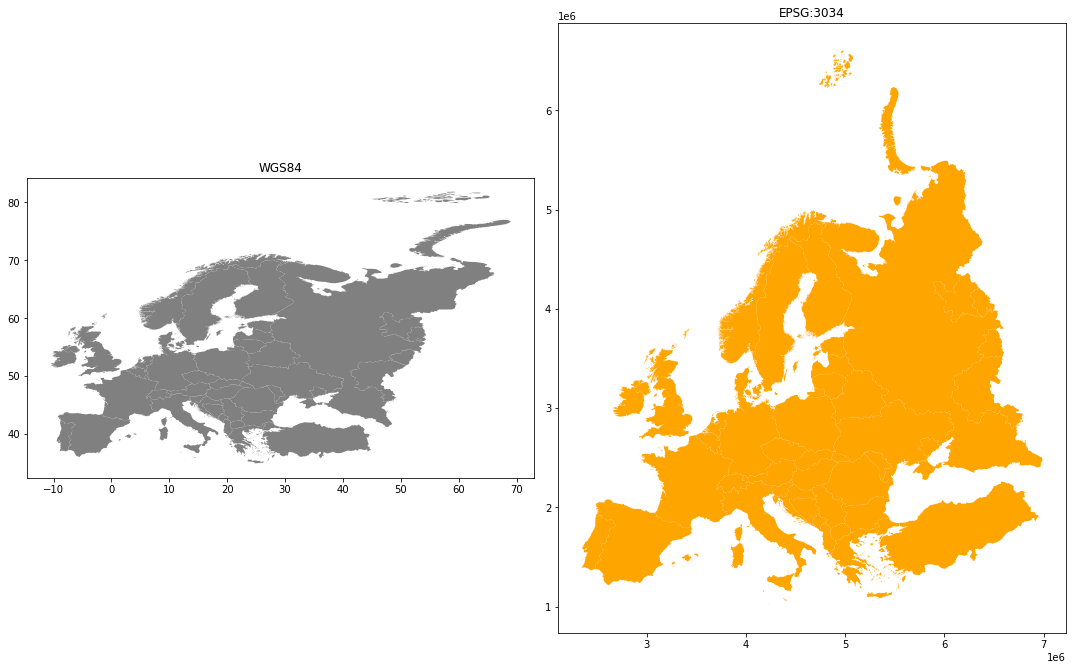

In [89]:
import matplotlib.pyplot as plt

# make subplots next to each other
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))

# plot the WGS84 data
data_wgs84.plot(ax=ax1, facecolor='gray')
ax1.set_title('WGS84')

# plot the EPSG:3034 data
shapefile_eu.plot(ax=ax2, facecolor='orange')
ax2.set_title('EPSG:3034')

# set aspect ratio as 1
ax1.set_aspect(aspect=1)
ax2.set_aspect(aspect=1)

# remove whitespace around the plot
plt.tight_layout()

In [92]:
# save the shapefile
save_shapefile(shapefile_eu, f"{DATA_DIR}/L2/Results/Europe_borders_epgs3034")